### Need to pull data and data that has the same amount of reviews per home

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from functions import sample_mean
from lists import stop_words,noise
from plots import model_plots
import string
import warnings
import os


%matplotlib inline
punctuation = set(string.punctuation)
sws = stop_words().get_sws()
noise = noise().get_noise()


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

listings = pd.read_pickle('/home/ubuntu/Notebooks/data/df_listings.pickle')

In [2]:
unique_listings = listings.groupby('id')[['review_scores_rating']]\
                          .agg('min').dropna()#.sample(frac=(1/8),random_state=3)
unique_listings['score'] = unique_listings['review_scores_rating'].div(20).round().replace(0,1)

unique_listings1 = unique_listings[unique_listings['score']==1]
unique_listings2 = unique_listings[unique_listings['score']==2]
unique_listings3 = unique_listings[unique_listings['score']==3]
unique_listings4 = unique_listings[unique_listings['score']==4]
unique_listings5 = unique_listings[unique_listings['score']==5]

unique_listings3 = unique_listings3.sample(n=100,random_state=3)
unique_listings4 = unique_listings4.sample(n=100,random_state=3)
unique_listings5 = unique_listings5.sample(n=100,random_state=3)

In [3]:
unique_listings = pd.concat([unique_listings1,
                             unique_listings2,
                             unique_listings3,
                             unique_listings4,
                             unique_listings5]).reset_index()

unique_listings.columns = ['listing_id', 'review_scores_rating', 'score']
listings_distribution = unique_listings['score'].value_counts()/unique_listings['score'].value_counts().sum()

Text(0,0.5,'Proportion of total')

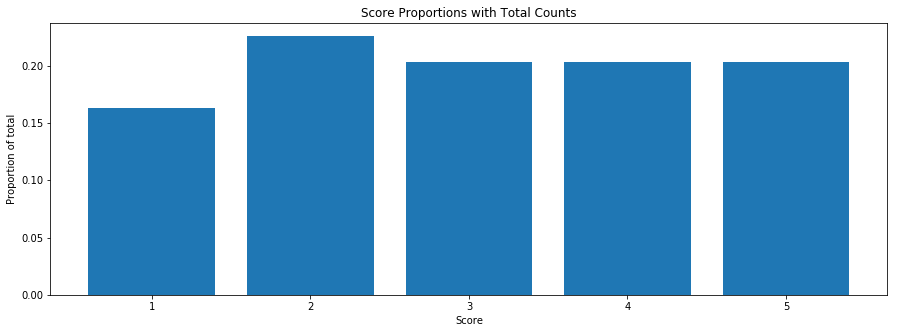

In [22]:
plt.figure(figsize=(15,5))
plt.bar(listings_distribution.index,listings_distribution.values)
plt.title('Score Proportions with Total Counts')
plt.xlabel('Score')
plt.ylabel('Proportion of total')

In [21]:
reviews = pd.read_pickle('/home/ubuntu/Notebooks/data/df_reviews.pickle').drop_duplicates()

reviews = reviews.reset_index()
print(reviews.shape)
remove_indices = reviews[reviews['comments']\
                         .str.contains('days before arrival. This is an automated posting.')].index
reviews = reviews.drop(remove_indices)
reviews
reviews = reviews.set_index('listing_id').join(unique_listings.set_index('listing_id'),
                                     how='inner').reset_index(drop=True)
reviews.shape

(1436585, 7)


(9167, 8)

In [6]:
reviews1 = reviews[reviews['score']==1]
reviews2 = reviews[reviews['score']==2]
reviews3 = reviews[reviews['score']==3].sample(n = 1000,random_state=3)
reviews4 = reviews[reviews['score']==4].sample(n = 1000,random_state=3)
reviews5 = reviews[reviews['score']==5].sample(n = 1000,random_state=3)
reviews_new = pd.concat([reviews1,reviews2,reviews3,reviews4,reviews5])

Text(0,0.5,'Proportion of total')

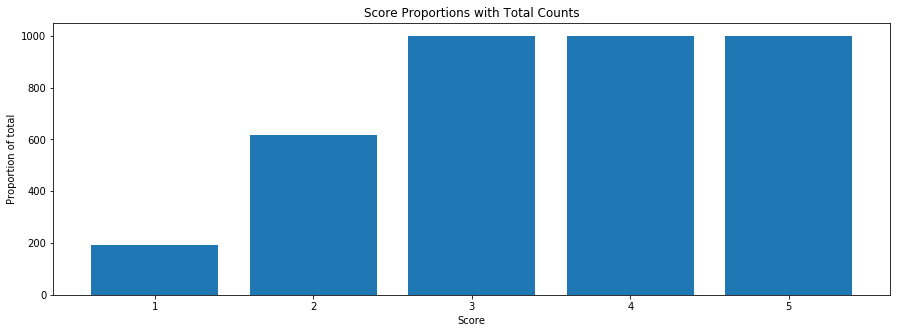

In [7]:
plt.figure(figsize=(15,5))
plt.bar(reviews_new['score'].value_counts().index,reviews_new['score'].value_counts().values)
plt.title('Score Proportions with Total Counts')
plt.xlabel('Score')
plt.ylabel('Proportion of total')

In [32]:
print(listings.shape)
listings['review_scores_rating'].lt(40).sum()

(308014, 32)


173